In [98]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/tipsofficial_top_videos.csv')

In [5]:
df.head()

,channel,title,published_at,duration,view_count,like_count,comment_count
0,Tips Official,"Tera Fitoor Lyrical - Genius | Utkarsh Sharma,...",2018-07-17T11:04:57Z,PT5M34S,789713802,4107077,161740
1,Tips Official,Dil Meri Na Sune Lyrical - Genius | Utkarsh Sh...,2018-08-03T07:30:11Z,PT4M22S,779518828,4206855,170804
2,Tips Official,Jeene Laga Hoon Lyrical - Ramaiya Vastavaiya|G...,2013-07-29T05:28:27Z,PT3M22S,598594500,3271158,79266
3,Tips Official,Kasam Khake Kaho | Dil Hai Tumhaara | Preity Z...,2009-12-09T07:49:01Z,PT5M21S,338669778,966511,23811
4,Tips Official,"Chamma Chamma | Fraud Saiyaan | Elli AvrRam, A...",2019-01-15T09:31:45Z,PT3M40S,319369057,1592186,37632


In [6]:
df.sample()

,channel,title,published_at,duration,view_count,like_count,comment_count
277,Tips Official,Badi Nazuk (Official Video) | Sonu Nigam | Ti...,2021-09-29T06:30:13Z,PT4M59S,4326336,42895,2596


In [7]:
df.dtypes

,0
channel,object
title,object
published_at,object
duration,object
view_count,int64
like_count,object
comment_count,int64


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   channel        540 non-null    object             
 1   title          540 non-null    object             
 2   published_at   540 non-null    datetime64[ns, UTC]
 3   duration       540 non-null    object             
 4   view_count     540 non-null    int64              
 5   like_count     540 non-null    float64            
 6   comment_count  540 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 33.8+ KB


In [9]:
df.shape

(549, 7)

In [49]:
df.isnull().sum()

,0
channel,0
title,0
published_at,0
duration,0
view_count,0
like_count,4
comment_count,0


In [51]:
df['like_count'].fillna(df['like_count'].mean(), inplace=True)

In [11]:
df.duplicated().sum()

9

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [60]:
df.describe()

,view_count,like_count,comment_count
count,5.400000e+02,5.400000e+02,540.000000
mean,2.122145e+07,1.193848e+05,4296.372222
std,6.533792e+07,3.436444e+05,13767.222471
min,1.147400e+04,3.740000e+02,0.000000
25%,9.928835e+05,6.347250e+03,151.500000
50%,4.520942e+06,2.778650e+04,601.000000
75%,1.566901e+07,9.668050e+04,2156.000000
max,7.897138e+08,4.206855e+06,170804.000000


In [15]:
df.columns

Index(['channel', 'title', 'published_at', 'duration', 'view_count',
       'like_count', 'comment_count'],
      dtype='object')

# Now, let’s have a look at the distribution of views, likes and comments of all the videos in the data:

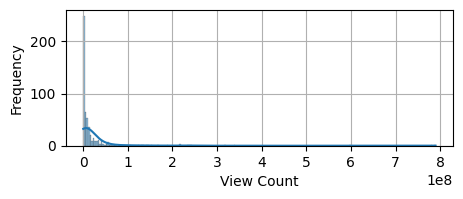

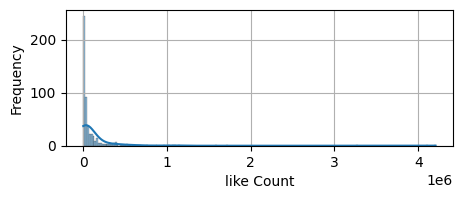

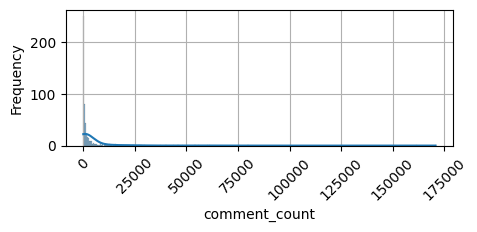

In [77]:
# view count distribution
plt.figure(figsize=(5,6))
plt.subplot(3,1,2)
sns.histplot(df['view_count'],kde=True)
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.grid()

# like count distribution
plt.figure(figsize=(5,6))
plt.subplot(3,1,2)
sns.histplot(df['like_count'],kde=True)
plt.xlabel('like Count')
plt.ylabel('Frequency')
plt.grid()

# comment count distribution
plt.figure(figsize=(5,6))
plt.subplot(3,1,2)
sns.histplot(df['comment_count'],kde=True)
plt.xlabel('comment_count')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid()



In [78]:
# Extract date components from 'published_at'
df['year'] = df['published_at'].dt.year
df['month'] = df['published_at'].dt.month
df['day'] = df['published_at'].dt.day

In [79]:
# Group by year or month and calculate total views
views_by_year = df.groupby('year')['view_count'].sum().reset_index()
views_by_month = df.groupby('month')['view_count'].sum().reset_index()


<Axes: xlabel='year', ylabel='view_count'>

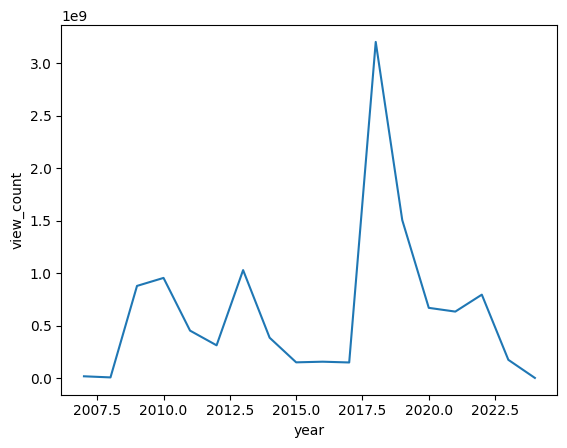

In [80]:
# Plot views over the year or month
sns.lineplot(x='year', y='view_count', data=views_by_year)


In [81]:
df['duration']

,duration
0,PT5M34S
1,PT4M22S
2,PT3M22S
3,PT5M21S
4,PT3M40S
...,...
544,PT16S
545,PT16S
546,PT21S
547,PT16S


In [84]:
#Convert duration from 'PT##M##S' to seconds
!pip install isodate
import isodate
df['duration_seconds'] = df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())[

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.1 MB/s eta 0:00:00


In [86]:
df['duration_seconds']

,duration_seconds
0,334.0
1,262.0
2,202.0
3,321.0
4,220.0
...,...
544,16.0
545,16.0
546,21.0
547,16.0


<Axes: xlabel='duration_seconds', ylabel='view_count'>

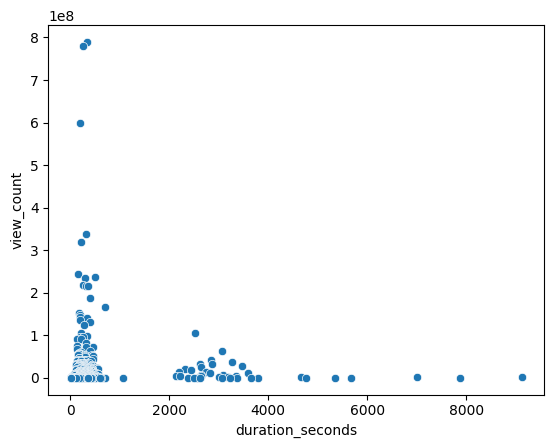

In [87]:
# Scatter plot to compare duration with view count
sns.scatterplot(x='duration_seconds', y='view_count', data=df)


#Like-to-View Ratio:

In [88]:
df['like_to_view_ratio'] = df['like_count'] / df['view_count']

In [89]:
top_engagement_videos = df.sort_values(by='like_to_view_ratio', ascending=False).head(10)
print(top_engagement_videos[['title', 'like_to_view_ratio']])

                                                 title  like_to_view_ratio
511  #TipsOfficial Ko Follow Karo Aur Dekho #YaiRe ...            0.095661
515  Make #youtubeshorts On #yaire | #yoyohoneysing...            0.092838
392  Husnn Hai Suhaana New (Teaser) | Song Out Now ...            0.092331
514  Yai Re 10 Million + Views | #HoneySingh #Iulia...            0.058703
524  This December, it's #PartyOnMyMind #KaalaJaadu...            0.056255
326  Teaser -Mirchi Lagi Toh | VarunDhawan, Sara | ...            0.048112
546  Only 10 days until you’re swept away! 😶‍🌫️#Mer...            0.046623
425  #mehboobmere #hindisongs #tipsofficial #loveso...            0.045665
522  The Fierce Warrior & The Wild Tiger Of #ponniy...            0.043062
517  #TaalSeTaalMila | #Taal | #AlkaYagnik | #UditN...            0.040614


# Comment-to-View Ratio:

In [90]:
df['comment_to_view_ratio'] = df['comment_count'] / df['view_count']

# Find videos with the highest comment-to-view ratio
top_comment_videos = df.sort_values(by='comment_to_view_ratio', ascending=False).head(10)
print(top_comment_videos[['title', 'comment_to_view_ratio']])

                                                 title  comment_to_view_ratio
125  Bhoot Police - Trailer | Saif Ali Khan | Arjun...               0.003620
135  Gawara Nahi | Asim Riaz, Himanshi Khurana | An...               0.003080
90   Mujhe Pyaar Pyaar Hai | Bhoot Police | Arjun K...               0.001924
339  EK DUA | Rahul Jain | FT. Shrenu Parikh | Kabi...               0.001695
543  #HappyBirthdayTwinkleKhanna | 90's Love Songs ...               0.001556
53   Yai Re | Yo Yo Honey Singh, Iulia Vantur | Mih...               0.001487
61   Race 3 Official Trailer | Salman Khan | Remo D...               0.001454
180  Powerful HANUMAN CHALISA from HanuMan | Prasan...               0.001400
235  Ponniyin Selvan Teaser | #PS1 Hindi | Mani Rat...               0.001386
156  Full Song: Honthon Pe Bas | Mika Singh | Shefa...               0.001300


# Video Popularity Over Time:

<Axes: xlabel='date', ylabel='view_count'>

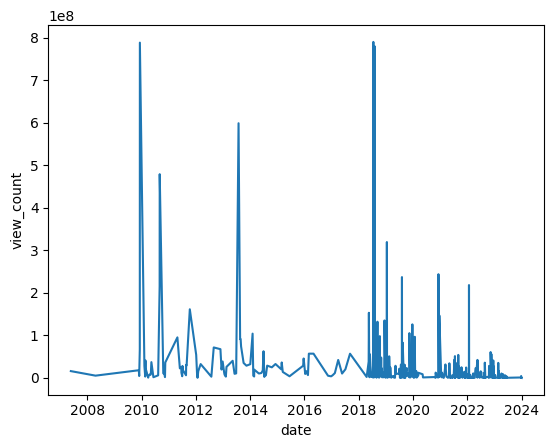

In [91]:
# Group by date and calculate total view counts
df['date'] = df['published_at'].dt.date
views_by_date = df.groupby('date')['view_count'].sum().reset_index()

# Plot views over time
sns.lineplot(x='date', y='view_count', data=views_by_date)

#Correlation Analysis:

<Axes: >

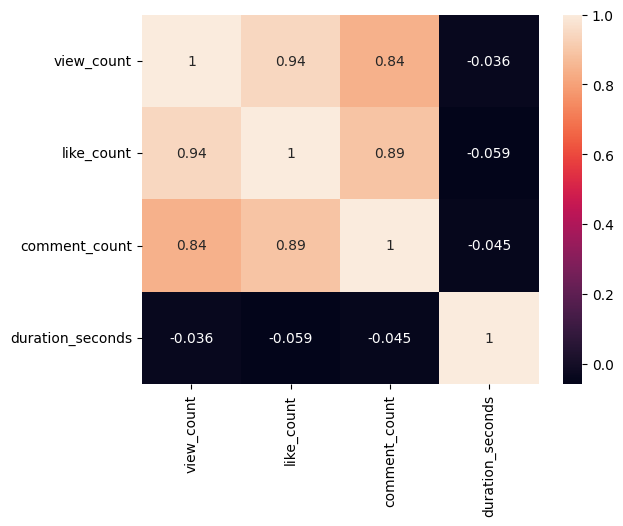

In [94]:
# Correlation matrix
correlation = df[['view_count', 'like_count', 'comment_count', 'duration_seconds']].corr()

# Heatmap of correlation matrix
sns.heatmap(correlation, annot=True )

# Most Liked or Commented Videos:

In [95]:
# Sort videos by like_count or comment_count
top_liked_videos = df.sort_values(by='like_count', ascending=False).head(10)
top_commented_videos = df.sort_values(by='comment_count', ascending=False).head(10)

print(top_liked_videos[['title', 'like_count']])
print(top_commented_videos[['title', 'comment_count']])

                                                title  like_count
1   Dil Meri Na Sune Lyrical - Genius | Utkarsh Sh...   4206855.0
0   Tera Fitoor Lyrical - Genius | Utkarsh Sharma,...   4107077.0
2   Jeene Laga Hoon Lyrical - Ramaiya Vastavaiya|G...   3271158.0
8   Sabki Baaratein Aayi | Zaara Yesmin | Parth Sa...   1718991.0
4   Chamma Chamma | Fraud Saiyaan | Elli AvrRam, A...   1592186.0
13  Heeriye Heeriye Ni Nasha Tera Karke | Race 3 |...   1150512.0
6   Khal Nayak Hoon Main Lyrical - Khal Nayak | Sa...   1106557.0
53  Yai Re | Yo Yo Honey Singh, Iulia Vantur | Mih...   1096870.0
20  Ashiqui Mein Teri 2.0 Official Song - Happy Ha...   1065783.0
15  Dil Meri Na Sune | Genius | Utkarsh Sharma, Is...   1037573.0
                                                 title  comment_count
1    Dil Meri Na Sune Lyrical - Genius | Utkarsh Sh...         170804
0    Tera Fitoor Lyrical - Genius | Utkarsh Sharma,...         161740
13   Heeriye Heeriye Ni Nasha Tera Karke | Race 3 |...          

# Channel-Wise Analysis:

<Axes: xlabel='view_count', ylabel='channel'>

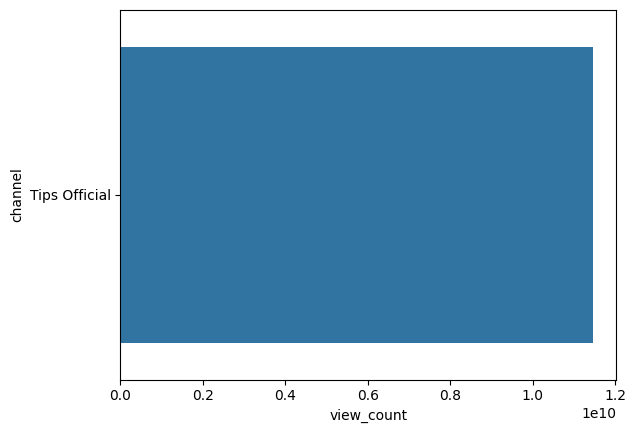

In [96]:
# Group by channel and calculate total or average views, likes, and comments
channel_stats = df.groupby('channel')[['view_count', 'like_count', 'comment_count']].sum().reset_index()

# Plot total views by channel
sns.barplot(x='view_count', y='channel', data=channel_stats)

In [16]:
top_videos = df.sort_values(by='view_count', ascending=False)

In [17]:
top_n_videos = top_videos.head(10)

In [19]:
print("Top 10 Videos by View Count:")
print(top_n_videos[['title', 'view_count']])

Top 10 Videos by View Count:
                                               title  view_count
0  Tera Fitoor Lyrical - Genius | Utkarsh Sharma,...   789713802
1  Dil Meri Na Sune Lyrical - Genius | Utkarsh Sh...   779518828
2  Jeene Laga Hoon Lyrical - Ramaiya Vastavaiya|G...   598594500
3  Kasam Khake Kaho | Dil Hai Tumhaara | Preity Z...   338669778
4  Chamma Chamma | Fraud Saiyaan | Elli AvrRam, A...   319369057
5  Husnn Hai Suhaana New - Coolie No.1| VarunDhaw...   243803586
6  Khal Nayak Hoon Main Lyrical - Khal Nayak | Sa...   237009044
7  Daiya Daiya Daiya Re | Dil Ka Rishta | Aishwar...   233446386
8  Sabki Baaratein Aayi | Zaara Yesmin | Parth Sa...   218259941
9  Mohabbat Dil Ka Sakoon Hai Aitbaar | Dil Hai T...   215909661


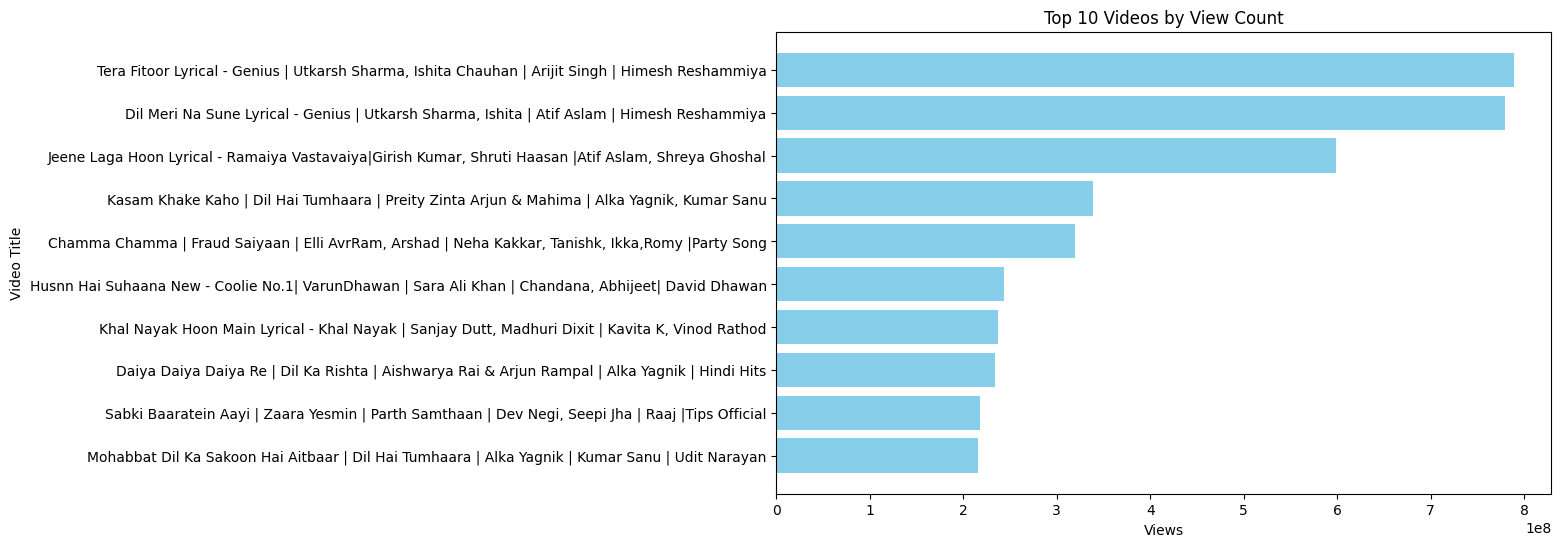

In [34]:
plt.figure(figsize=(10, 6))
plt.barh(top_n_videos['title'], top_n_videos['view_count'], color='skyblue')
plt.xlabel('Views')
plt.ylabel('Video Title')
plt.title('Top 10 Videos by View Count')
plt.gca().invert_yaxis()  # To display the highest view count at the top
plt.show()